# Projet NLP (Analyse des Sentiments liés au COVID sur Twitter)

## Presenté par :
### Mouhammed niah

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Corona_NLP_train.csv",encoding="ISO-8859-1")

# Exploration

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Definition des variable

    UserName : Identifiant unique attribué à chaque utilisateur de Twitter. Il permet de distinguer les différents utilisateurs sur la plateforme.

    ScreenName : Nom d'écran unique associé à chaque utilisateur de Twitter. C'est le nom qui apparaît sur le profil public de l'utilisateur et qui est utilisé pour identifier l'utilisateur dans les mentions et les réponses.

    Location : Emplacement géographique déclaré par l'utilisateur sur son profil Twitter. Cela peut inclure le nom d'une ville, d'un pays ou d'une région. Dans ce jeu de données, environ 21% des valeurs de cette colonne sont manquantes, indiquant que certains utilisateurs n'ont pas spécifié leur emplacement.

    TweetAt : Date et heure auxquelles le tweet a été publié sur Twitter. Cette information permet de suivre le moment précis de la publication du tweet.

    OriginalTweet : Le texte complet du tweet publié par l'utilisateur. Il s'agit du contenu brut du message partagé sur Twitter, qui peut inclure du texte, des liens, des hashtags et des mentions.

    Sentiment : Le sentiment exprimé dans le tweet, catégorisé en cinq classes : "Positive" (positif), "Negative" (négatif), "Neutral" (neutre), "Extremely Positive" (extrêmement positif) et "Extremely Negative" (extrêmement négatif). Cette variable permet de comprendre le ton général du tweet, allant de positif à négatif.

In [4]:
df.shape

(41157, 6)

## Valeures manquantes

## df.isna().sum()/df.shape[0]

<AxesSubplot:>

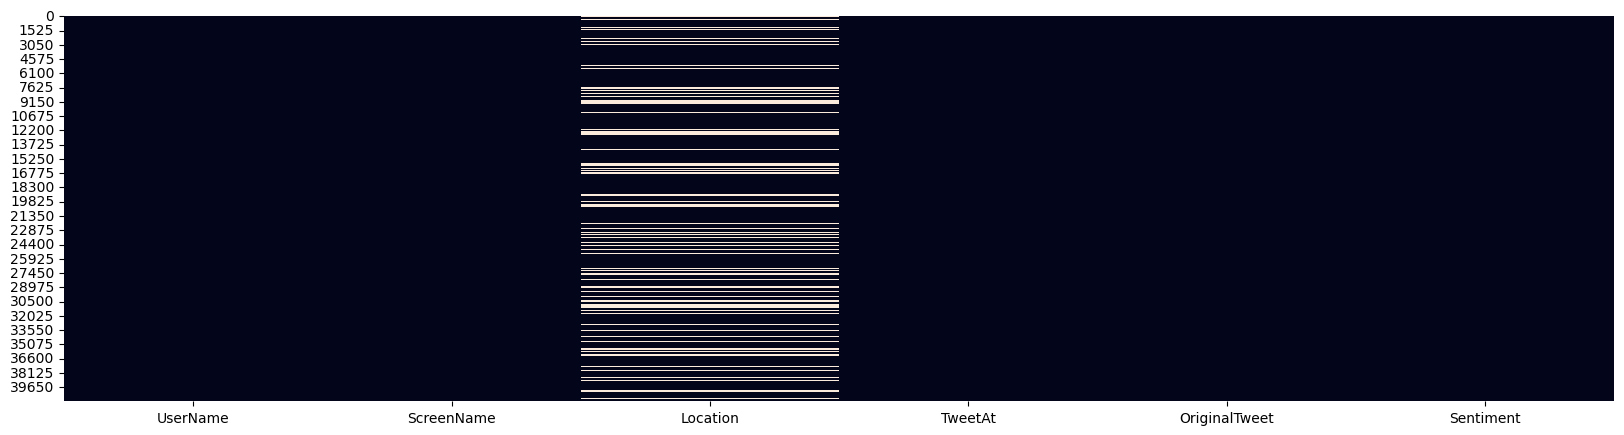

In [5]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isna(),cbar=False)

    UserName et ScreenName : Aucune valeur manquante dans ces deux colonnes, ce qui signifie que chaque ligne a des informations sur l'utilisateur et son nom d'écran.

    Location : Environ 20.87% des entrées dans la colonne "Location" sont manquantes. Cela indique que près d'un cinquième des utilisateurs n'ont pas spécifié leur emplacement dans les tweets.

    TweetAt et OriginalTweet : Aucune valeur manquante dans ces colonnes, ce qui signifie que chaque tweet a été enregistré avec sa date et son contenu d'origine.

    Sentiment : Aucune valeur manquante dans cette colonne, ce qui signifie que chaque tweet a été étiqueté avec un sentiment spécifique (Positive, Negative, Neutral, Extremely Positive, Extremely Negative).

En résumé, il y a une quantité significative de valeurs manquantes dans la colonne "Location" (environ 21%), ce qui peut être un défi lors de l'analyse, surtout si l'emplacement est une caractéristique cruciale pour l'étude. Pour les autres colonnes, il n'y a pas de valeurs manquantes, ce qui facilitera l'analyse et le traitement ultérieur des données. Il serait peut-être nécessaire de prendre des décisions sur la façon de gérer les valeurs manquantes dans la colonne "Location" en fonction des objectifs spécifiques de l'analyse ou de l'étude.

In [6]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

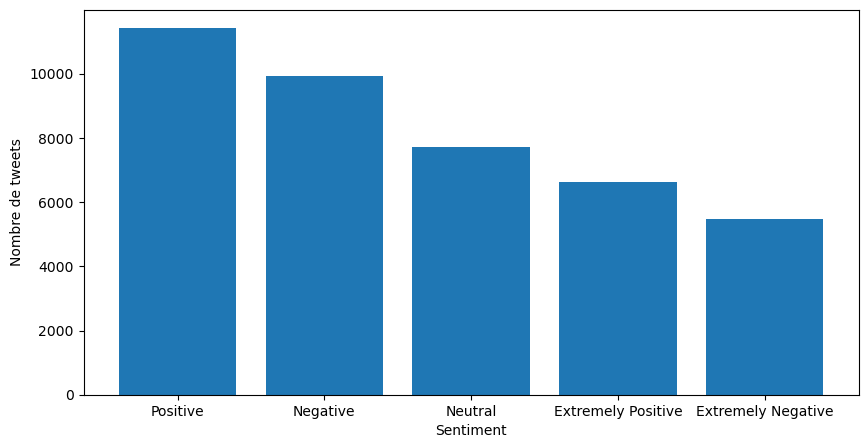

In [7]:
import matplotlib.pyplot as plt
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Nombre de tweets')
plt.show()


    Positive : Il y a 11,422 tweets exprimant un sentiment positif.
    Negative : Il y a 9,917 tweets exprimant un sentiment négatif.
    Neutral : Il y a 7,713 tweets exprimant un sentiment neutre.
    Extremely Positive : Il y a 6,624 tweets exprimant un sentiment extrêmement positif.
    Extremely Negative : Il y a 5,481 tweets exprimant un sentiment extrêmement négatif.

Ces chiffres montrent la diversité des réactions des utilisateurs de Twitter par rapport à la pandémie COVID-19, allant de la positivité extrême à la négativité extrême.

In [8]:
df.shape

(41157, 6)

In [9]:
df.loc[1,"OriginalTweet"]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [10]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

# Traitement de nos Données

## Suppression des ponctuation 

La suppression de la ponctuation dans un projet de NLP (Traitement Automatique du Langage Naturel) est une étape préliminaire importante lors de la préparation des données textuelles. Voici quelques raisons pour lesquelles la suppression de la ponctuation est généralement effectuée :

    Simplification du Texte : La suppression de la ponctuation simplifie le texte en éliminant les caractères non alphabétiques. Cela peut faciliter le traitement ultérieur du texte en réduisant la complexité des données.

    Uniformisation des Mots : Les mots contenant de la ponctuation, comme "word!" et "word", sont traités différemment par les algorithmes de NLP. En supprimant la ponctuation, on s'assure que des mots similaires sont traités de manière uniforme.

    Amélioration de la Cohérence : La suppression de la ponctuation peut améliorer la cohérence des données. Par exemple, "mot." et "mot" deviennent identiques après la suppression de la ponctuation.

    Focus sur le Contenu : Dans de nombreux cas, la ponctuation n'ajoute pas de valeur sémantique significative à l'analyse du texte. En supprimant la ponctuation, l'attention se concentre sur le contenu textuel réel plutôt que sur les caractères de séparation.

    Réduction de la Dimensionnalité : Dans le cadre de la vectorisation des mots, la suppression de la ponctuation réduit la dimensionnalité de l'espace vectoriel. Cela peut être particulièrement utile lorsque vous travaillez avec des ensembles de données volumineux, car cela réduit le nombre de fonctionnalités à traiter.

    Amélioration de la Précision : Certains modèles de NLP peuvent être sensibles à la ponctuation. En la supprimant, vous pouvez améliorer la précision des modèles en éliminant les bruits indésirables.

    Facilitation de la Tokenisation : La suppression de la ponctuation facilite la découpe du texte en unités discrètes appelées "tokens". Les tokens sont les éléments de base sur lesquels de nombreuses opérations de traitement du langage naturel sont effectuées.

En résumé, la suppression de la ponctuation est une étape de prétraitement essentielle qui simplifie et prépare le texte pour les étapes ultérieures de l'analyse et du traitement automatique du langage naturel.

In [11]:
import string

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def suprime_ponctuation(text):
    new_text="".join([ch for ch in text if ch not in string.punctuation])
    return new_text

In [14]:
df['Sans_ponc_OriginalTweet']=df['OriginalTweet'].apply(lambda x : suprime_ponctuation(x))

In [15]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sans_ponc_OriginalTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


================================================================================================

In [16]:
import re
def tokenizer(text):
    words = re.split('\W+', text)
    return words

In [17]:
df['list_mot']=df['Sans_ponc_OriginalTweet'].apply(lambda x : tokenizer(x))

In [18]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sans_ponc_OriginalTweet,list_mot
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,"[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...,"[Coronavirus, Australia, Woolworths, to, give,..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...,"[Me, ready, to, go, at, supermarket, during, t..."


##  StopWord

La suppression des stopwords dans un projet de NLP (Traitement Automatique du Langage Naturel) est essentielle pour plusieurs raisons :

    Réduction du Bruit : Les stopwords, tels que "le", "et", "de", sont des mots couramment utilisés mais n'apportent pas beaucoup de sens au texte. En les supprimant, on élimine le bruit et se concentre sur les mots clés plus significatifs.

    Économie d'Espace et de Temps : Les stopwords apparaissent fréquemment dans un texte, donc les stocker ou les traiter peut consommer beaucoup de mémoire et de puissance de calcul. Les supprimer permet d'économiser à la fois de l'espace de stockage et du temps de traitement.

    Amélioration de la Précision : Lorsque l'on se concentre sur les mots significatifs plutôt que sur les stopwords, les modèles de NLP peuvent produire des résultats plus précis, car ils se basent sur des termes plus pertinents pour la signification du texte.

    Conservation du Sens : Supprimer les stopwords n'affecte généralement pas le sens global du texte, car ces mots n'apportent pas de contribution sémantique importante. Ainsi, le sens du texte est préservé tout en réduisant le poids des données.

In [19]:
import nltk

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mouhammed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stopwork_en=nltk.corpus.stopwords.words('english')

In [22]:
stopwork_en

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
def suprime_stopword(liste):
    result=[word for word in liste if word not in stopwork_en]
    return result

In [24]:
df['Sans_stopword']=df['list_mot'].apply(lambda x: suprime_stopword(x))

In [25]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sans_ponc_OriginalTweet,list_mot,Sans_stopword
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,"[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...","[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...,"[Coronavirus, Australia, Woolworths, to, give,...","[Coronavirus, Australia, Woolworths, give, eld..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, PLEASE, dont, pa..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...,"[Me, ready, to, go, at, supermarket, during, t...","[Me, ready, go, supermarket, COVID19, outbreak..."


====================================================================

## Stemming

Le Stemming dans un projet de NLP (Traitement Automatique du Langage Naturel) :

    Réduction des Mots à Leur Racine : Le stemming consiste à réduire les mots à leur racine ou à leur forme de base. Par exemple, les mots "manger", "mangeait", "mangeant" seraient tous réduits à "mang" grâce au stemming. Cela simplifie le texte en regroupant les variations morphologiques d'un mot sous une seule forme.

    Amélioration de la Cohérence : En réduisant les mots à leur forme de base, le texte devient plus cohérent. Les mots apparentés sont ramenés à une forme commune, ce qui facilite la comparaison et l'analyse.

    Réduction de la Dimensionnalité : En utilisant le stemming, on réduit le nombre de mots différents dans le texte. Cela peut être bénéfique pour les modèles de machine learning, car cela diminue la dimensionnalité de l'espace des caractéristiques, ce qui peut conduire à des modèles plus performants, surtout lorsque les données sont limitées.

    Traitement des Variantes : Le stemming est particulièrement utile lorsque l'on traite des textes provenant de sources différentes où les mots peuvent être écrits de manière légèrement différente. En ramenant tous les mots à leur forme de base, on traite les variantes de manière uniforme.

    Attention aux Erreurs : Cependant, il est important de noter que le stemming peut parfois produire des racines qui ne sont pas des mots réels ou peuvent même transformer un mot en un autre qui a une signification différente. Il faut donc faire preuve de prudence et comprendre le contexte du texte traité.

In [26]:
ps=nltk.PorterStemmer()

In [27]:
def stemming(liste):
    result=[ps.stem(word) for word in liste]
    return result

In [28]:
df['liste_stemming']=df['Sans_stopword'].apply(lambda x:stemming(x))

In [29]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sans_ponc_OriginalTweet,list_mot,Sans_stopword,liste_stemming
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,"[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...","[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...","[menyrbi, philgahan, chrisitv, httpstcoifz9fan..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...","[advic, talk, neighbour, famili, exchang, phon..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...,"[Coronavirus, Australia, Woolworths, to, give,...","[Coronavirus, Australia, Woolworths, give, eld...","[coronaviru, australia, woolworth, give, elder..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, PLEASE, dont, pa...","[my, food, stock, one, empti, pleas, dont, pan..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...,"[Me, ready, to, go, at, supermarket, during, t...","[Me, ready, go, supermarket, COVID19, outbreak...","[me, readi, go, supermarket, covid19, outbreak..."


=============================================================================

## Lemmatization

La Lemmatisation dans un Projet de NLP (Traitement Automatique du Langage Naturel) :

    Recherche de la Forme Canonique : Contrairement au stemming, qui se contente de réduire les mots à leur racine, la lemmatisation vise à trouver la forme canonique ou le lemme d'un mot. Par exemple, les mots "manger", "mangeait", "mangeant" seraient tous ramenés à "manger" grâce à la lemmatisation. Cela garantit que le mot résultant est un mot réel et compréhensible.

    Préservation de la Sémantique : La lemmatisation préserve la sémantique des mots. En utilisant la lemmatisation, on obtient des mots qui ont un sens précis dans le dictionnaire, ce qui est essentiel pour des tâches NLP telles que la recherche d'entités nommées ou l'analyse de sentiments.

    Contexte Grammatical : La lemmatisation prend en compte le contexte grammatical d'un mot dans une phrase. Elle tient compte de la catégorie grammaticale du mot (nom, verbe, adjectif, etc.) et le ramène à sa forme de base en fonction de son rôle dans la phrase.

    Qualité des Résultats : En raison de sa compréhension approfondie des mots et de leur contexte, la lemmatisation produit généralement des résultats de meilleure qualité par rapport au stemming. Cependant, elle peut être plus lente que le stemming en raison de sa complexité.

    Utilisation dans les Applications Complexes : La lemmatisation est particulièrement utile dans les applications NLP complexes où la précision et la cohérence du texte transformé sont cruciales, comme la traduction automatique, la résumé automatique, et l'analyse de texte pour la recherche scientifique.

In [30]:
wn = nltk.WordNetLemmatizer()

In [31]:
def lemmatiz(liste):
    result=[wn.lemmatize(word) for word in liste]
    return result

In [32]:
df['liste_lemmatization']=df['liste_stemming'].apply(lambda x:stemming(x))

In [33]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sans_ponc_OriginalTweet,list_mot,Sans_stopword,liste_stemming,liste_lemmatization
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,"[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...","[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...","[menyrbi, philgahan, chrisitv, httpstcoifz9fan...","[menyrbi, philgahan, chrisitv, httpstcoifz9fan..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...","[advic, talk, neighbour, famili, exchang, phon...","[advic, talk, neighbour, famili, exchang, phon..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...,"[Coronavirus, Australia, Woolworths, to, give,...","[Coronavirus, Australia, Woolworths, give, eld...","[coronaviru, australia, woolworth, give, elder...","[coronaviru, australia, woolworth, give, elder..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, PLEASE, dont, pa...","[my, food, stock, one, empti, pleas, dont, pan...","[my, food, stock, one, empti, plea, dont, pani..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...,"[Me, ready, to, go, at, supermarket, during, t...","[Me, ready, go, supermarket, COVID19, outbreak...","[me, readi, go, supermarket, covid19, outbreak...","[me, readi, go, supermarket, covid19, outbreak..."


In [34]:
def grouper(liste):
    return " ".join(liste)
    

In [35]:
df['clean_tweet']=df['liste_lemmatization'].apply(lambda x:grouper(x))

In [36]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sans_ponc_OriginalTweet,list_mot,Sans_stopword,liste_stemming,liste_lemmatization,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,"[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...","[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...","[menyrbi, philgahan, chrisitv, httpstcoifz9fan...","[menyrbi, philgahan, chrisitv, httpstcoifz9fan...",menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...","[advic, talk, neighbour, famili, exchang, phon...","[advic, talk, neighbour, famili, exchang, phon...",advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...,"[Coronavirus, Australia, Woolworths, to, give,...","[Coronavirus, Australia, Woolworths, give, eld...","[coronaviru, australia, woolworth, give, elder...","[coronaviru, australia, woolworth, give, elder...",coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, PLEASE, dont, pa...","[my, food, stock, one, empti, pleas, dont, pan...","[my, food, stock, one, empti, plea, dont, pani...",my food stock one empti plea dont panic there ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...,"[Me, ready, to, go, at, supermarket, during, t...","[Me, ready, go, supermarket, COVID19, outbreak...","[me, readi, go, supermarket, covid19, outbreak...","[me, readi, go, supermarket, covid19, outbreak...",me readi go supermarket covid19 outbreak not i...


In [37]:
data=df[['UserName','ScreenName','Location','clean_tweet','Sentiment']]

In [38]:
data.head()

,UserName,ScreenName,Location,clean_tweet,Sentiment
0,3799,48751,London,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...,Neutral
1,3800,48752,UK,advic talk neighbour famili exchang phone numb...,Positive
2,3801,48753,Vagabonds,coronaviru australia woolworth give elderli di...,Positive
3,3802,48754,NaN,my food stock one empti plea dont panic there ...,Positive
4,3803,48755,NaN,me readi go supermarket covid19 outbreak not i...,Extremely Negative


===============================================================================

# Modelisation

## Vectorization

La Vectorisation dans un Projet de NLP (Traitement Automatique du Langage Naturel) :

    Transformation des Mots en Vecteurs : La vectorisation dans le contexte du NLP consiste à convertir des mots ou des phrases en vecteurs numériques compréhensibles par les algorithmes d'apprentissage automatique. Chaque mot est associé à un vecteur numérique dans un espace vectoriel. Cette représentation vectorielle permet aux algorithmes de machine learning de manipuler et d'analyser le texte.

    Utilisation d'Algorithmes d'Apprentissage : La vectorisation est essentielle car de nombreux algorithmes d'apprentissage automatique, tels que les réseaux de neurones, les machines à vecteurs de support (SVM), et les méthodes d'ensemble comme les forêts aléatoires, ne peuvent pas travailler directement avec du texte brut. Ils nécessitent des données numériques en entrée.

    Différentes Méthodes de Vectorisation : Il existe différentes techniques de vectorisation, notamment la TF-IDF (Term Frequency-Inverse Document Frequency) et les méthodes de word embedding telles que Word2Vec et GloVe. Ces méthodes attribuent des valeurs numériques aux mots en fonction de leur fréquence, de leur importance dans le contexte du document ou de leur signification sémantique.

    Capture de la Sémantique : Les méthodes de vectorisation basées sur le contexte, comme Word2Vec, capturent également la sémantique des mots en examinant les mots voisins dans le texte. Cela signifie que des mots similaires ou liés dans le sens seront représentés par des vecteurs similaires ou proches dans l'espace vectoriel.

    Réduction de la Dimensionalité : La vectorisation peut également impliquer des techniques de réduction de la dimensionalité, telles que l'analyse en composantes principales (PCA) ou le t-SNE, qui permettent de représenter des données complexes dans un espace de dimensions réduites tout en préservant les relations importantes entre les mots.

    Amélioration de la Précision : La vectorisation permet d'améliorer la précision des modèles NLP en fournissant une représentation numérique plus riche et significative du texte. Elle permet aux modèles de comprendre les relations entre les mots et d'effectuer des tâches telles que la classification de texte, la traduction automatique, et l'analyse de sentiments avec une meilleure précision.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [40]:
vectorisation=TfidfVectorizer(max_features=20000)

In [41]:
vect=vectorisation.fit_transform(data['clean_tweet'])

In [42]:
vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
vect[:10, :10].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
vect.shape

(41157, 20000)

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score


In [46]:
le=LabelEncoder()

In [47]:
y = data['Sentiment']
y = le.fit_transform(y)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(vect.toarray(), y, test_size=0.2, random_state=42)

In [49]:
def random_forest_hyper_params(n_decision_tree, depth):
    alg_RandomForest = RandomForestClassifier(n_estimators=n_decision_tree, max_depth=depth, n_jobs=-1)
    model = alg_RandomForest.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    precision, recall, fscore, support = score(Y_test, predictions, average='weighted')
    print('nb decision tree: {} / Depth: {} | Precision: {} / Recall: {}'.format(
        n_decision_tree, depth, round(precision, 3), round(recall, 3)))

In [50]:
for ith_decision_tree in [5, 20, 50,100]:
    
    for depth in [10, 20]:
        
        random_forest_hyper_params(ith_decision_tree, depth)

nb decision tree: 5 / Depth: 10 | Precision: 0.444 / Recall: 0.317
nb decision tree: 5 / Depth: 20 | Precision: 0.421 / Recall: 0.345
nb decision tree: 20 / Depth: 10 | Precision: 0.535 / Recall: 0.294
nb decision tree: 20 / Depth: 20 | Precision: 0.522 / Recall: 0.357
nb decision tree: 50 / Depth: 10 | Precision: 0.636 / Recall: 0.295
nb decision tree: 50 / Depth: 20 | Precision: 0.579 / Recall: 0.35
nb decision tree: 100 / Depth: 10 | Precision: 0.649 / Recall: 0.295
nb decision tree: 100 / Depth: 20 | Precision: 0.598 / Recall: 0.345


In [51]:
from sklearn.svm import SVC


In [52]:
#from sklearn.model_selection import GridSearchCV

# Définir les paramètres que vous souhaitez tester
#param_grid = {
 #   'kernel': ['linear', 'poly'],
 #   'C': [0.1, 1, 10],
#}


# Créer un modèle SVM
#svm_model = SVC()

# Utiliser la recherche sur grille avec validation croisée (par exemple, 5 plis)
#grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Entraîner le modèle sur les données d'entraînement
#grid_search.fit(X_train, Y_train)

# Afficher les meilleurs paramètres trouvés par la recherche sur grille
#print("Meilleurs paramètres :", grid_search.best_params_)

# Afficher la précision du modèle avec les meilleurs paramètres sur les données de test
#best_svm_model = grid_search.best_estimator_
#accuracy = best_svm_model.score(X_test, Y_test)
#print("Précision sur les données de test :", accuracy)
